In [ ]:
#Description: This is a python program for finance
#             This program will show you how to compute 
#             portfolio simple returns, get daily returns and volatility etc. 

In [1]:
#Import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/Users/rahulmitra/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Get the stock symbols for the portfolio
#FAANG 
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [3]:
#Get the stock starting date
stockStartDate = '2013-01-01'

In [4]:
#Get todays date and format it the form YYYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2020-07-07


In [8]:
#Get the number of assets in the portfolio
numAssets = len(stockSymbols)
print('You have '+str(numAssets)+ ' assets in your portfolio.')

You have 5 assets in your portfolio.


In [9]:
#Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks= stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
                   data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
                   return data

In [10]:
#Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-06-30,227.070007,2758.820068,364.799988,455.040009,1413.609985
2020-07-01,237.550003,2878.699951,364.109985,485.640015,1438.040039
2020-07-02,233.419998,2890.300049,364.109985,476.890015,1464.699951


In [11]:
#Create a function to visualize the portfolio
def showGraph(stocks= stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
    
    #Create a title for the portfolio
    title = 'Portfolio '+col+ ' Price History'
    
    #Get the stocks
    my_stocks = getMyPortfolio(stocks=stocks, start=start, end=today)
    
    #Give the figure size
    plt.figure(figsize=(12.2, 4.5))
    
    #Loop through each stock and plot the price
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label=c)
    plt.title(title)
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel(col+ ' Price USD ($)', fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()

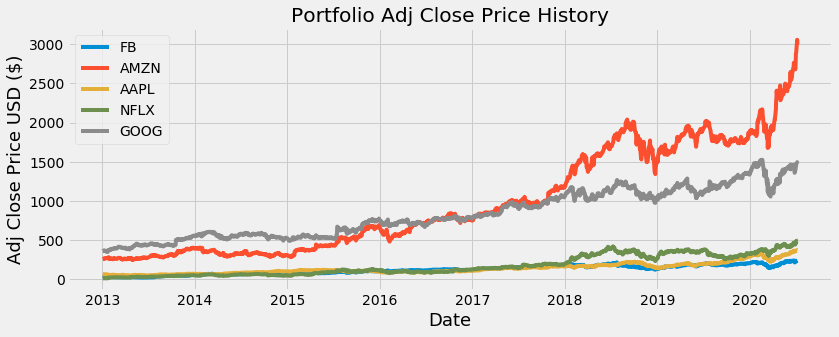

In [12]:
#Show the adjusted close price for FAANG
showGraph(stockSymbols)

In [13]:
#Calculate the simple returns
daily_simple_returns = my_stocks.pct_change(1)

#Show the daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-06-30,0.029143,0.029265,0.008348,0.017440,0.013362
2020-07-01,0.046153,0.043453,-0.001891,0.067247,0.017282
2020-07-02,-0.017386,0.004030,0.000000,-0.018017,0.018539


In [14]:
#Show the stock correlation
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.505461,0.435633,0.347714,0.564179
AMZN,0.505461,1.000000,0.427742,0.440095,0.603298
AAPL,0.435633,0.427742,1.000000,0.251806,0.533055
NFLX,0.347714,0.440095,0.251806,1.000000,0.416357
GOOG,0.564179,0.603298,0.533055,0.416357,1.000000


In [15]:
#Show the covariance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000464,0.000208,0.000164,0.000217,0.000195
AMZN,0.000208,0.000365,0.000142,0.000244,0.000185
AAPL,0.000164,0.000142,0.000304,0.000127,0.000149
NFLX,0.000217,0.000244,0.000127,0.000842,0.000194
GOOG,0.000195,0.000185,0.000149,0.000194,0.000258


In [16]:
#Show the variance 
daily_simple_returns.var()

Symbols
FB      0.000464
AMZN    0.000365
AAPL    0.000304
NFLX    0.000842
GOOG    0.000258
dtype: float64

In [17]:
#Print the standard deviation for daily simple returns
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.021542
AMZN    0.019096
AAPL    0.017428
NFLX    0.029021
GOOG    0.016068
dtype: float64

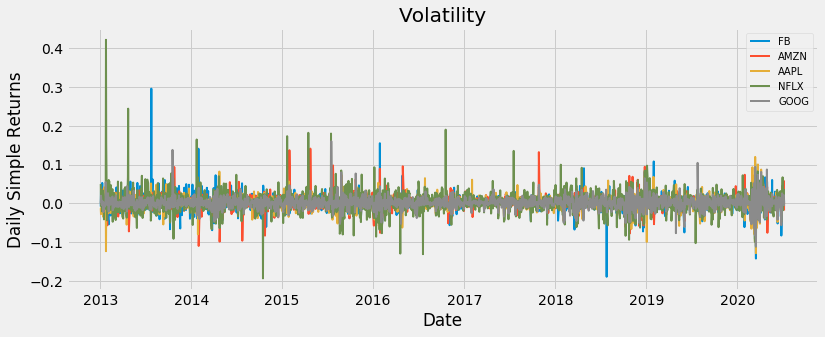

In [18]:
#Visualize the stocks daily simple returns,Volatility
plt.figure(figsize=(12,4.5))

#Loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns[c], lw=2, label = c)
    
#Create a legend
plt.legend(loc='upper right', fontsize = 10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show()

In [20]:
#Show the mean of the daily simple returns
dailyMeanSimpleReturns = daily_simple_returns.mean()

#Print
print("The daily mean simple return: ")
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.001368
AMZN    0.001482
AAPL    0.001049
NFLX    0.002326
GOOG    0.000878
dtype: float64


In [21]:
#Calculate the expected portfolio daily return
randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1]) #40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

#Print the expected portfolio return
print("The daily expected portfolio return: "+ str(portfolioSimpleReturn))

The daily expected portfolio return: 0.001330532197673336


In [22]:
#Get the yearly simple return
print("Expected annualised portfolio simple return: " +str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return: 0.336624646011354


In [23]:
#Calculate the growth of the investment
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()

#Show the cumulative simple returns
dailyCumulSimplReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987377,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959874,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956797,1.055972,1.013896
...,...,...,...,...,...
2020-06-30,8.109643,10.721776,5.325384,34.618845,3.923702
2020-07-01,8.483929,11.187672,5.315311,36.946853,3.991511
2020-07-02,8.336429,11.232755,5.315311,36.281165,4.065510


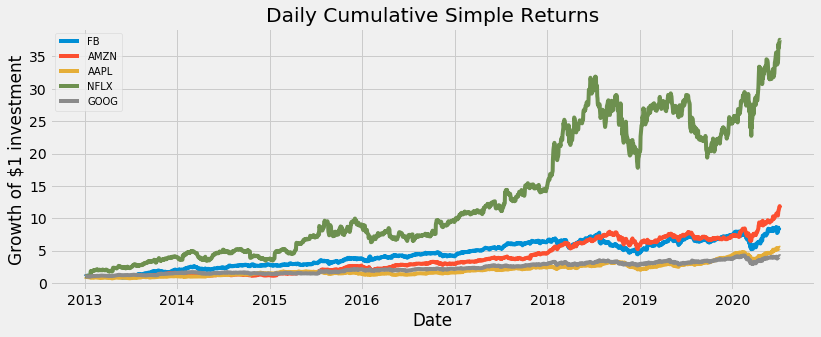

In [25]:
#Visualize the daily cumulative simple returns
plt.figure(figsize=(12.2, 4.5))
for c in dailyCumulSimplReturn.columns.values:
    plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], label = c)
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')
plt.show()